In [0]:
# Please find below the Project for Statistical Learning course. This is an individual assignment. Kindly submit it before it's deadline.

The Titan Insurance Company has just installed a new incentive payment scheme for its lift policy sales force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies, but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference.

Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during the month. For example, suppose salesperson X has, in the month, sold seven policies for which the sums assured are £1000, £2500, £3000, £5000, £10000, £35000. X's output for the month is the total of these sums assured, £61,500. Titan's new scheme is that the sales force receives low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company, but they are looking for sales increases which more than compensate. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months.

The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover.

To test the effectiveness of the scheme, Titan have taken a random sample of 30 salespeople measured their output in the penultimate month prior to changeover and then measured it in the fourth month after the changeover (they have deliberately chosen months not too close to the changeover). The outputs of the salespeople are shown in Table 1



Questions


Find the mean of old scheme and new scheme column. (5 points)
Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)
What conclusion does the test (p-value) lead to? (2.5 points)
Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:
        a) The probability of a type 1 error? (2.5 points)

        b) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)

        c) Power of the test (5 points)

In [0]:


## https://www.datacamp.com/community/tutorials/web-scraping-using-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_1samp,ttest_ind,wilcoxon
from statsmodels.stats.power import ttest_power
 

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Data.xlsx to Data (1).xlsx


In [0]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Data.xlsx']))

In [17]:
df.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
SALESPERSON                  30 non-null int64
Old Scheme (in thousands)    30 non-null int64
New Scheme (in thousands)    30 non-null int64
dtypes: int64(3)
memory usage: 800.0 bytes


In [19]:
df.columns

Index(['SALESPERSON', 'Old Scheme (in thousands)',
       'New Scheme (in thousands)'],
      dtype='object')

In [0]:
df.SALESPERSON = pd.Categorical(df.SALESPERSON)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
SALESPERSON                  30 non-null category
Old Scheme (in thousands)    30 non-null int64
New Scheme (in thousands)    30 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.1 KB


In [22]:
df.describe()

,Old Scheme (in thousands),New Scheme (in thousands)
count,30.000000,30.000000
mean,68.033333,72.033333
std,20.455980,24.062395
min,28.000000,32.000000
25%,54.000000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


In [0]:
df1=pd.DataFrame(df)

In [82]:
df1.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


In [0]:
df1['New']="NEW"
df1['Old']="OLD"

In [95]:
df1.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands),New,Old
0,1,57,62,NEW,OLD
1,2,103,122,NEW,OLD
2,3,59,54,NEW,OLD
3,4,75,82,NEW,OLD
4,5,84,84,NEW,OLD


In [110]:
list1 = np.array(df1['Old Scheme (in thousands)'])
list1



array([ 57, 103,  59,  75,  84,  73,  35, 110,  44,  82,  67,  64,  78,
        53,  41,  39,  80,  87,  73,  65,  28,  62,  49,  84,  63,  77,
        67, 101,  91,  50])

In [111]:
list2 = np.array(df1['New Scheme (in thousands)'])
list2

array([ 62, 122,  54,  82,  84,  86,  32, 104,  38, 107,  84,  85,  99,
        39,  34,  58,  73,  53,  66,  78,  41,  71,  38,  95,  81,  58,
        75,  94, 100,  68])

In [0]:
scheme = np.append(list1,list2)

In [116]:
scheme

array([ 57, 103,  59,  75,  84,  73,  35, 110,  44,  82,  67,  64,  78,
        53,  41,  39,  80,  87,  73,  65,  28,  62,  49,  84,  63,  77,
        67, 101,  91,  50,  62, 122,  54,  82,  84,  86,  32, 104,  38,
       107,  84,  85,  99,  39,  34,  58,  73,  53,  66,  78,  41,  71,
        38,  95,  81,  58,  75,  94, 100,  68])

In [0]:
list3 = np.array(df1['Old'])
list4 = np.array(df1['New'])
scheme_type = np.append(list3,list4)


In [0]:
df_n = pd.DataFrame({'Scheme_type':scheme_type,'Scheme':scheme})

In [130]:
df_n.head()

,Scheme_type,Scheme
0,OLD,57
1,OLD,103
2,OLD,59
3,OLD,75
4,OLD,84


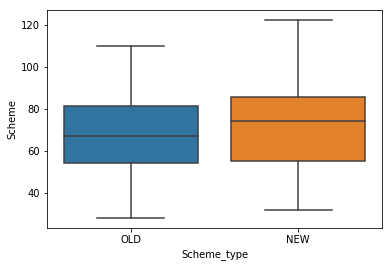

In [135]:
sns.boxplot(y='Scheme',x='Scheme_type',data=df_n)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1184e49e8>,
      dtype=object)

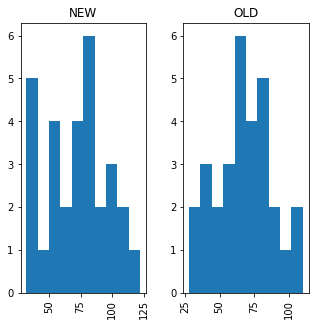

In [173]:
df_n.hist(by='Scheme_type',column='Scheme',figsize=(5,5))

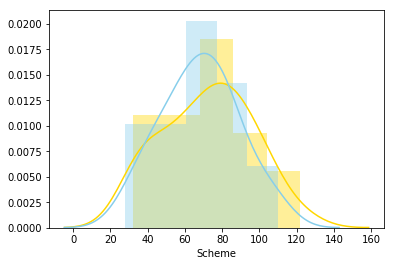

In [171]:
sns.distplot(df_n[df_n['Scheme_type']=='NEW']['Scheme'],color='gold')
sns.distplot(df_n[df_n['Scheme_type']=='OLD']['Scheme'],color='skyblue')


In [174]:
df.columns

Index(['SALESPERSON', 'Old Scheme (in thousands)', 'New Scheme (in thousands)',
       'New', 'Old'],
      dtype='object')

In [176]:
## Find the mean of old scheme and new scheme column. (5 points)

old , new = df['Old Scheme (in thousands)'].mean() , df['New Scheme (in thousands)'].mean()

'Old scheme mean is = {} and new scheme mean is = {}'.format(old , new)

'Old scheme mean is = 68.03333333333333 and new scheme mean is = 72.03333333333333'

In [0]:
## Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points) 

 ## What conclusion does the test (p-value) lead to? (2.5 points)


# H0 =  mean output is same for old and new scheme
# H1 =  mean output of new scheme is greater than old scheme

In [0]:
t_statistic, p_value = ttest_1samp(df['New Scheme (in thousands)']-df['Old Scheme (in thousands)'],0)

In [180]:
print(t_statistic, p_value)  ## p value >> 0.05 so we accept Null hypothesis and says there is no significance increase in mean output of new scheme

1.5559143823544377 0.13057553961337662


In [0]:
z_statistic, p_value = wilcoxon(df['New Scheme (in thousands)']-df['Old Scheme (in thousands)'])

In [182]:
print(z_statistic, p_value)  ## p value > 0.05 so we accept Null hypothesis and says there is no significance increase in mean output of new scheme

131.0 0.06116952762758769


In [0]:
Zstats = (np.mean(df['New Scheme (in thousands)']) - np.mean(df['Old Scheme (in thousands)']))/np.std(df['New Scheme (in thousands)'])

In [186]:
ttest_power(Zstats,nobs=len(np.array(df['New Scheme (in thousands)']))-1,alpha=0.05,alternative='larger')

0.22474055598474652

In [0]:
## with ttest_power there is only 22% chance to reject null hypothesis , so there is no significance increase in the mean output of new scheme

In [0]:
##  Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. 
## If this figure is alternative hypothesis, what is: a) The probability of a type 1 error? (2.5 points)

##    b) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)

  ##  c) Power of the test (5 points)

In [195]:
t_statistic, p_value = ttest_1samp(df['New Scheme (in thousands)']-df['Old Scheme (in thousands)']-5,0)
print(t_statistic, p_value)  ## p value >> 0.05 so we accept Null hypothesis and says there is no significance increase in mean output of new scheme by £5000

-0.3889785955886094 0.7001334912613286


In [0]:
## a) The probability of a type 1 error? (2.5 points)

## Ans - The probability of a type 1 error 70 %

In [204]:
##    b) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)


dollar =5000
val = (dollar * 0.80)/1000
val


4.0

In [209]:
t_statistic, p_value = ttest_1samp(df['New Scheme (in thousands)']-df['Old Scheme (in thousands)']-val,0)
print(t_statistic, p_value)  ## p- value of the hypothesis test if we test for a difference of $5000 is 1.0


0.0 1.0


In [197]:
## c ) power of test

Zstats = (5)/np.std(df['New Scheme (in thousands)'])
ttest_power(Zstats,nobs=len(np.array(df['New Scheme (in thousands)']))-1,alpha=0.05,alternative='larger')

0.29660245254588913

In [0]:
## with ttest_power there is only 29% chance to reject null hypothesis , so there is no significance increase in the mean output of new scheme